In [2]:
#Assignment module 6 Simple linear regression sorting_time data 

# lets import files Delivery_time and calories 
emp <- read.csv(file.choose())

In [5]:
emp

Salary_hike,Churn_out_rate
<int>,<int>
1580,92
1600,85
1610,80
1640,75
1660,72
1690,70
1706,68
1730,65
1800,62


In [6]:
# structure of data frame , it is the data relating to salary and churn out rate
str(emp) # data type is integer 
attach(emp)
summary(emp)


'data.frame':	10 obs. of  2 variables:
 $ Salary_hike   : int  1580 1600 1610 1640 1660 1690 1706 1730 1800 1870
 $ Churn_out_rate: int  92 85 80 75 72 70 68 65 62 60


  Salary_hike   Churn_out_rate 
 Min.   :1580   Min.   :60.00  
 1st Qu.:1618   1st Qu.:65.75  
 Median :1675   Median :71.00  
 Mean   :1689   Mean   :72.90  
 3rd Qu.:1724   3rd Qu.:78.75  
 Max.   :1870   Max.   :92.00  

[1] 0.7238458

[1] 0.5457985

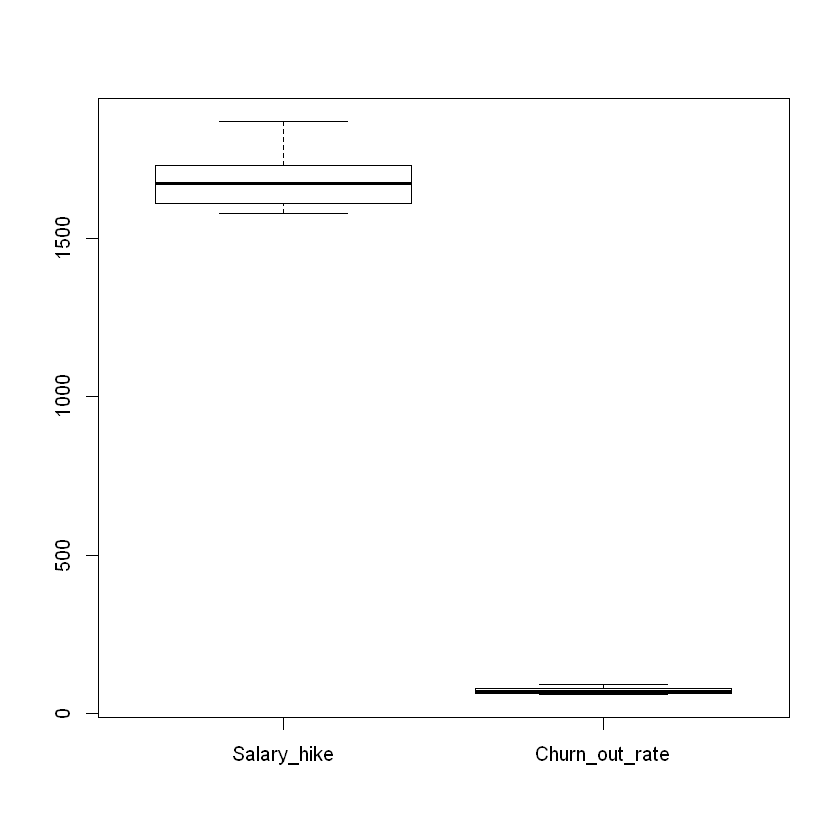

In [7]:
# priliminary investigation for outliers 
boxplot(emp)
# as there is no outliers we can see 
library(moments) # both aer positive skewness 
skewness(Salary_hike)
skewness(Churn_out_rate)

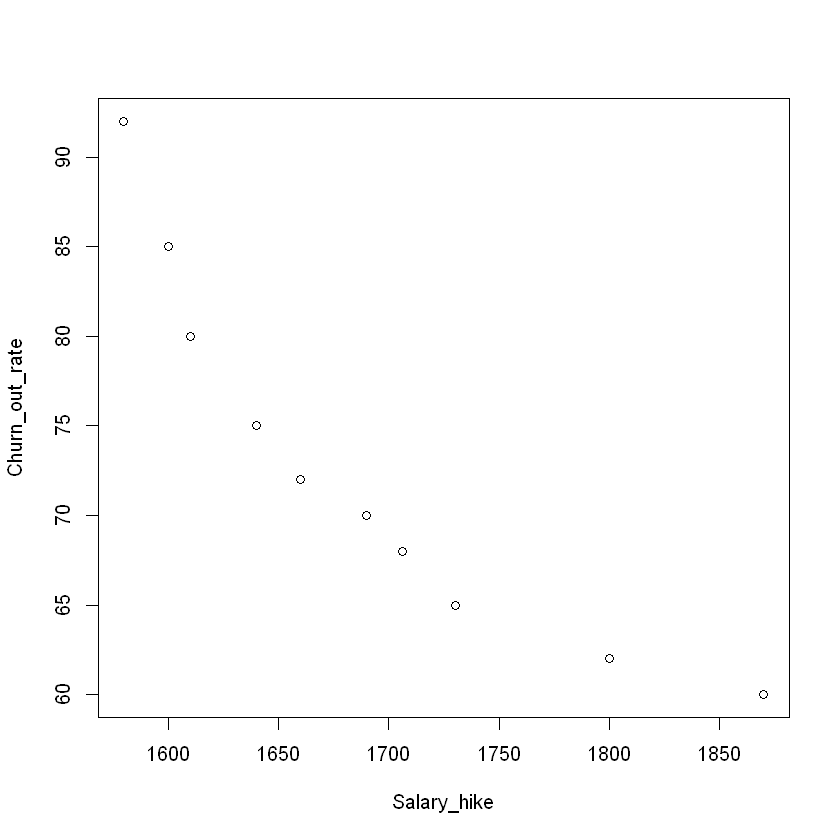

In [8]:
plot(Salary_hike,Churn_out_rate)

In [9]:
# Pre porcessing data checking for NA values 
dim(emp)
str(emp)  # data frame 
sum(is.na(emp)==T) # as there is no NA value if 0 there is no na value exist

mean(Salary_hike) # checking if perfectly mean is coming or not 
mean(Churn_out_rate) # mean is proof there is no NA value

[1] 10  2

'data.frame':	10 obs. of  2 variables:
 $ Salary_hike   : int  1580 1600 1610 1640 1660 1690 1706 1730 1800 1870
 $ Churn_out_rate: int  92 85 80 75 72 70 68 65 62 60


[1] 0

[1] 1688.6

[1] 72.9

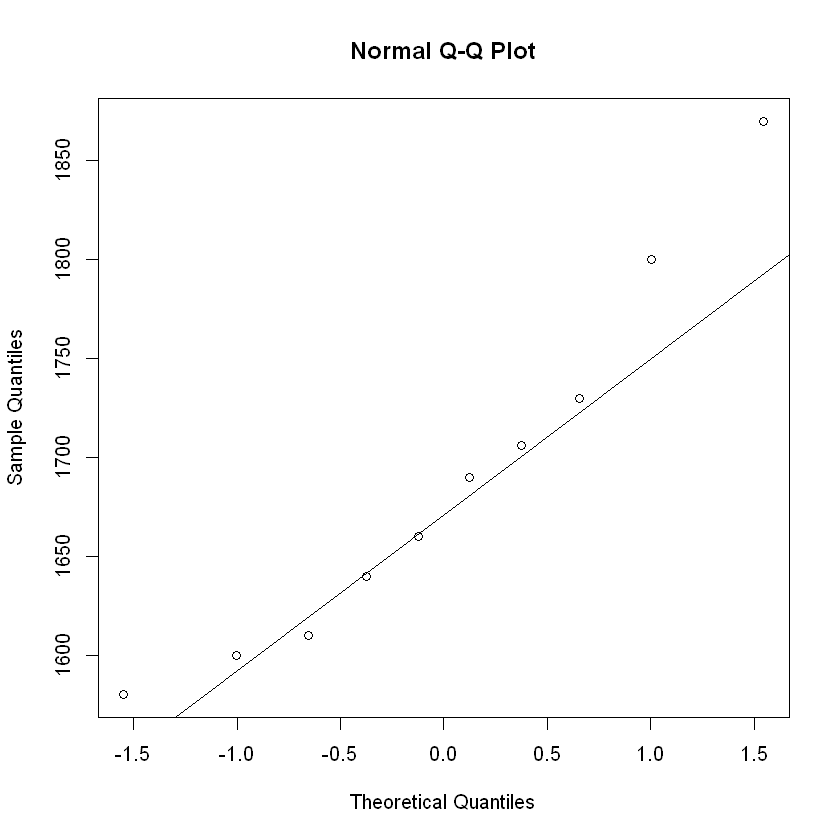

[1] -0.9117216

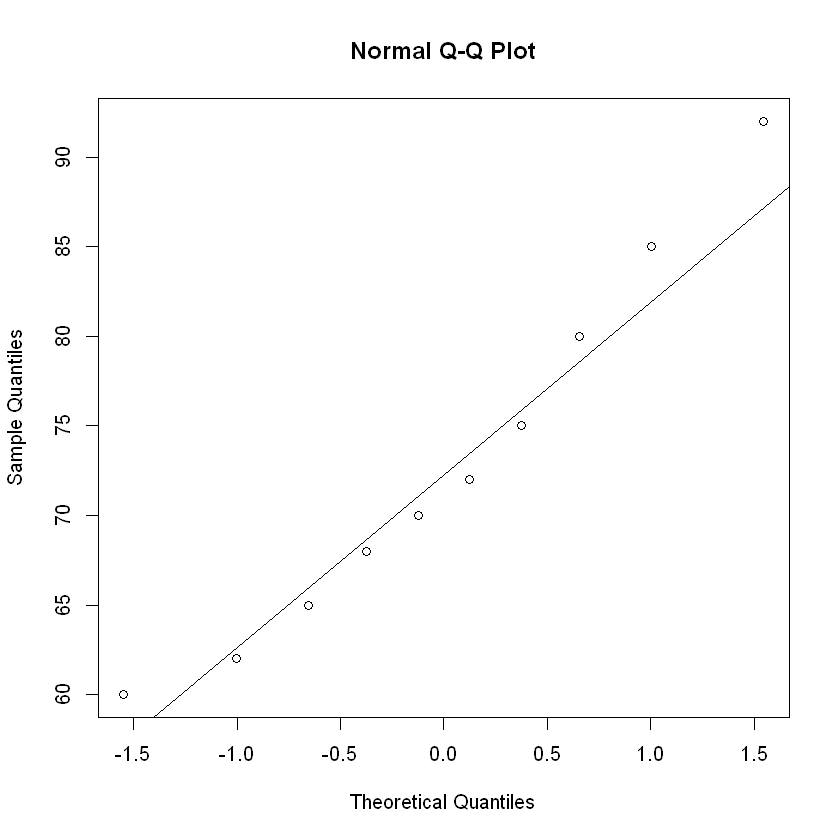

In [10]:
# Just checking how normally data is distributed
qqnorm(Salary_hike)
qqline(Salary_hike)
qqnorm(Churn_out_rate)
qqline(Churn_out_rate)
cor(Salary_hike,Churn_out_rate) # correlation is 0.825997260795533

In [11]:
# we trying to fit a linear regression line  by plotting linear model 
lm <- lm(Churn_out_rate~Salary_hike,data=emp) # linear model
rmse <- sqrt(mean(lm$residuals^2))
rmse # rmse is too high value 
plot( Salary_hike,Churn_out_rate) # scatter plot X is Waist and y is AT
abline(lm(Churn_out_rate~Salary_hike,data = emp),col = 'red') # made a regression line 

ERROR: Error in is.data.frame(data): object 'del' not found


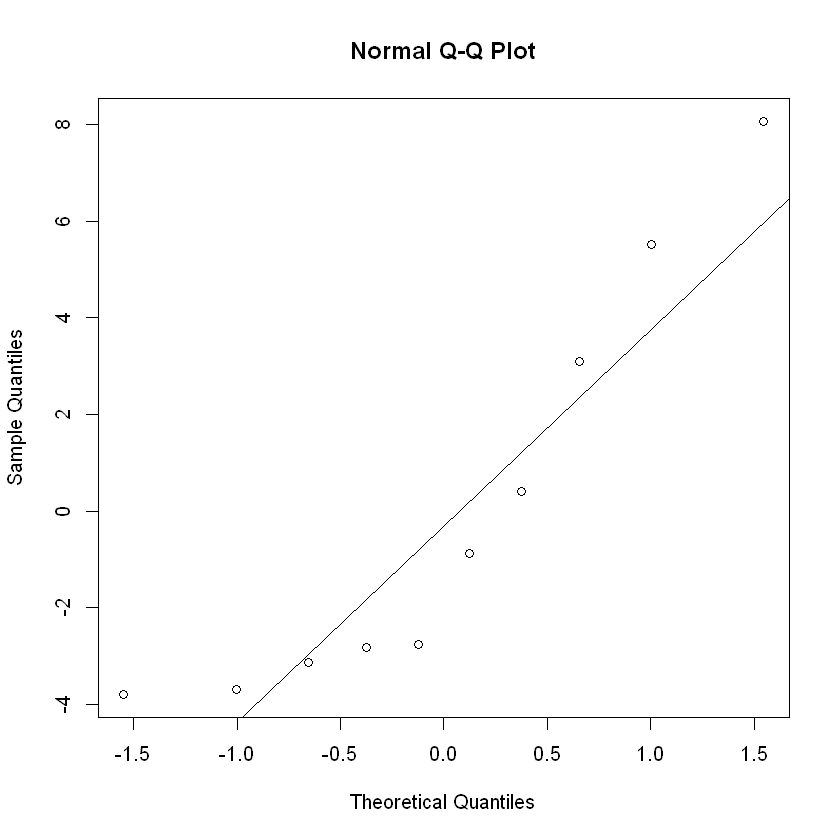

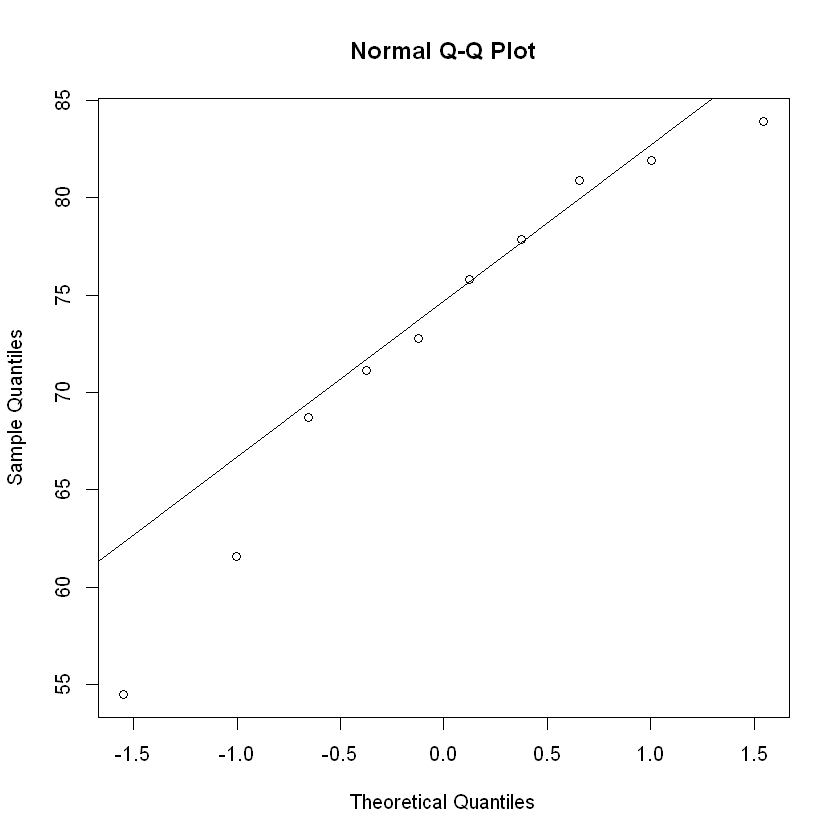

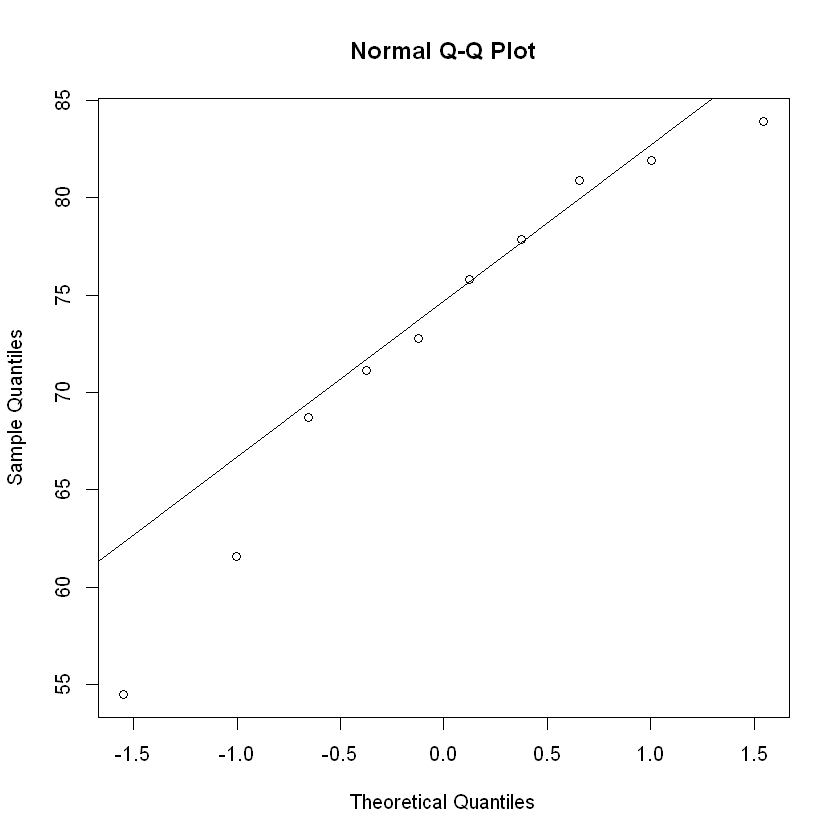

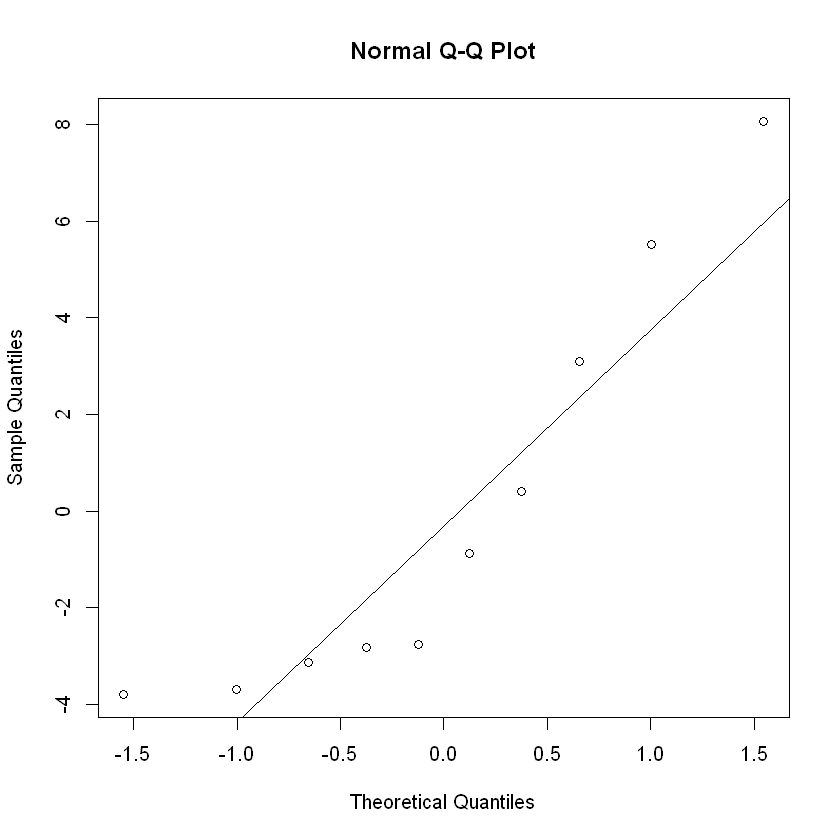

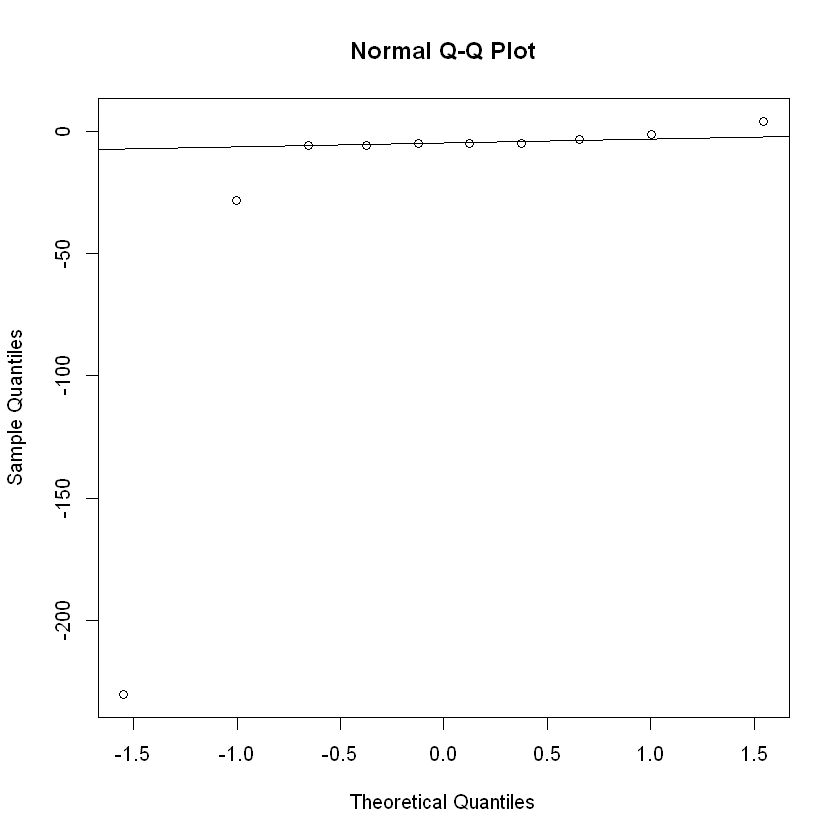

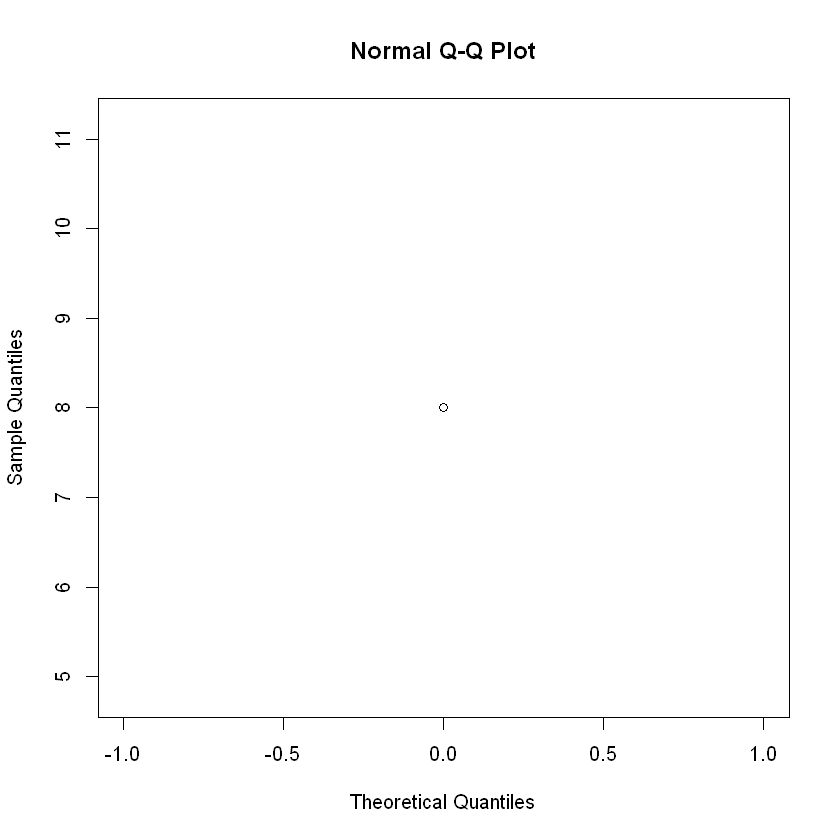

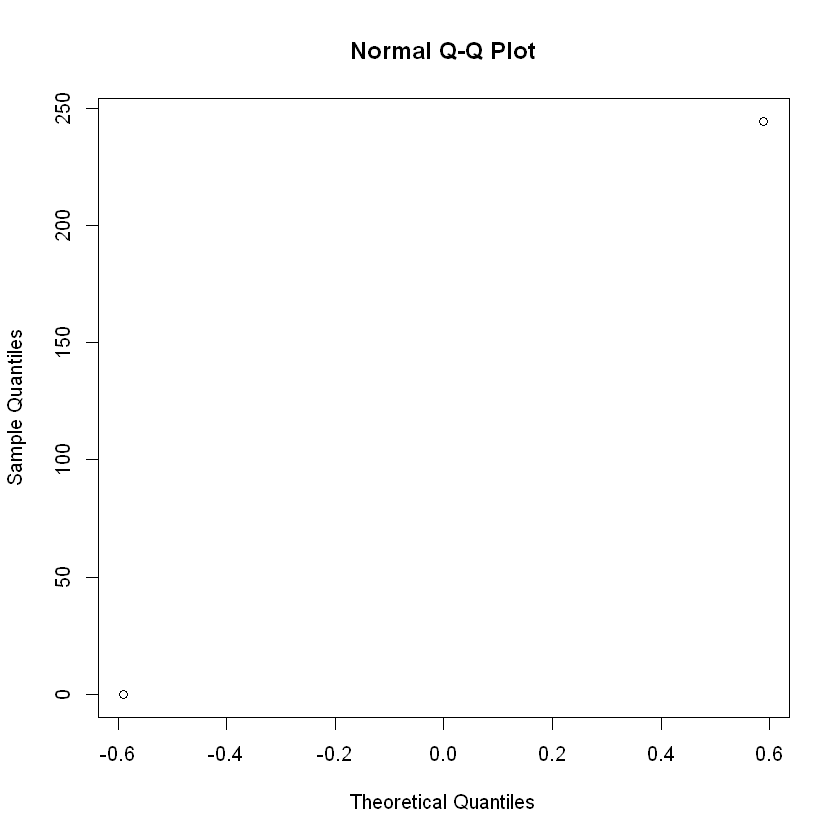

In [21]:
# Dignosis of model in qqnorm mothod
qqnorm(resid(lm))# checking linearity residuals of linear model
qqline(resid(lm)) # trying to fitting a line on the model made
qqnorm(fitted(lm)) # checking fittled 
qqline(fitted(lm)) # linear model fitting line
qqnorm(fitted.values(lm))# checking fitted values
qqline(fitted.values(lm))# checking fitted values
qqnorm(residuals(lm))# checking residials 
qqline(residuals(lm))# fitting line on residuals
qqnorm(effects(lm)) # effects of lm in quantiles
qqline(effects(lm)) # fitting line on effects
qqnorm(df.residual(lm)) # checking digree of freedom
qqnorm(coefficients(lm))# checking cofficnent point on lm. 


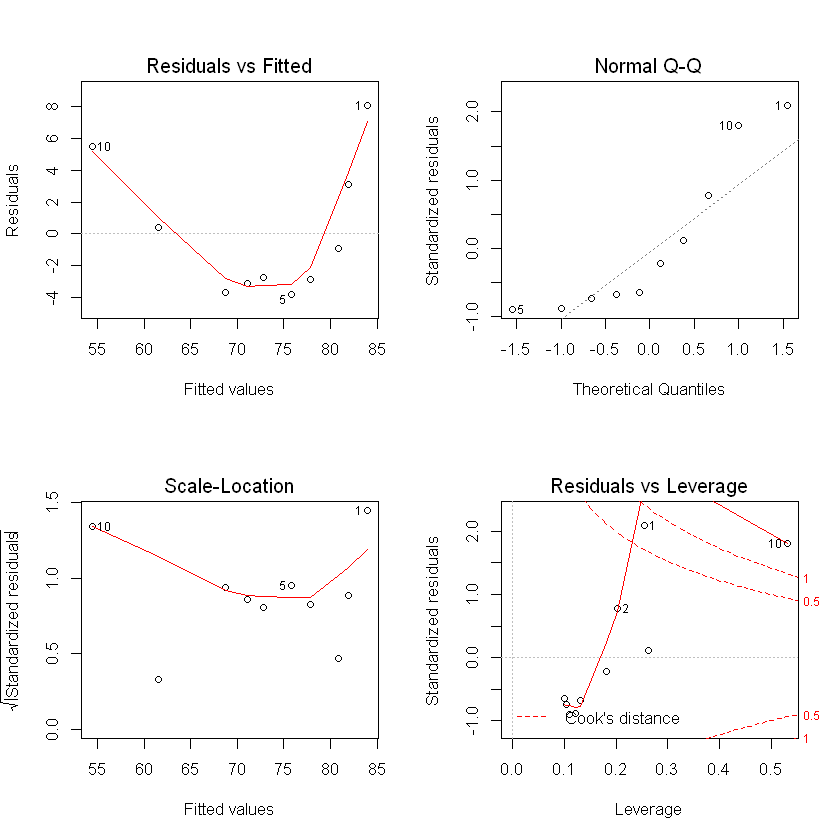

In [22]:
# dignostic plot togeather all need to increase size 
par(mfrow = c(2, 2))
plot(lm)


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'broom'


The following object is masked from 'package:modelr':

    bootstrap




Potentially influential observations of
	 lm(formula = Churn_out_rate ~ Salary_hike, data = del) :

   dfb.1_  dfb.Slr_ dffit   cov.r   cook.d  hat  
1   1.38_* -1.32_*   1.70_*  0.36    0.75    0.25
9  -0.05    0.05     0.06    1.77_*  0.00    0.26
10 -2.04_*  2.10_*   2.33_*  0.98    1.84_*  0.53


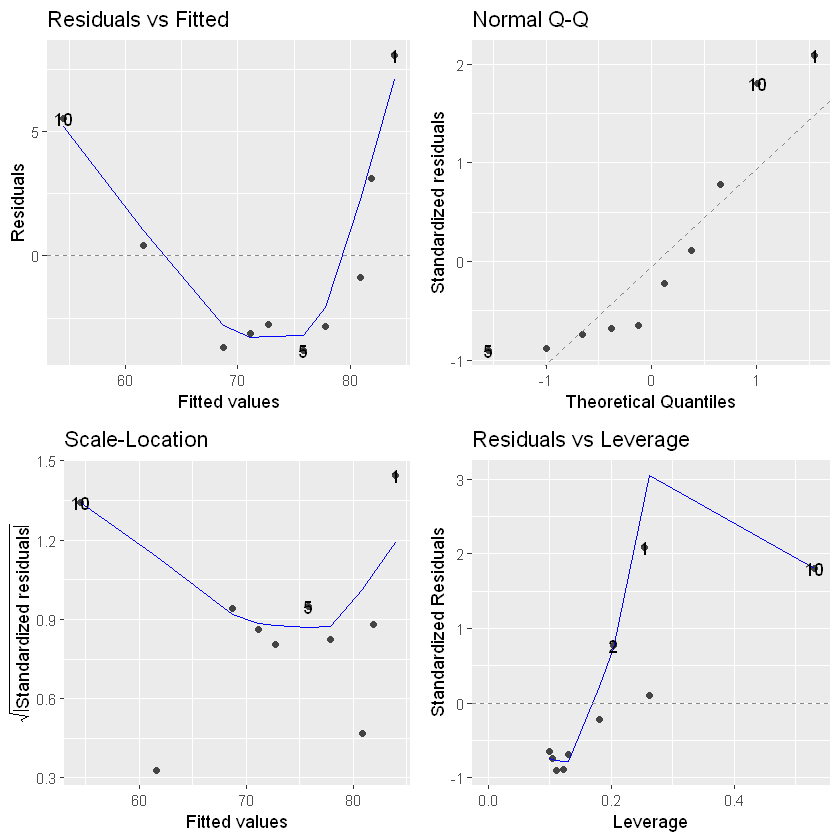

In [23]:
#dignostic plot togeather with outliers with autopilot
#install.packages("ggfortify")
# second method of dignostic plot ggplot 2 
library("tidyverse")
library("modelr")
library("broom")
library("ggfortify")
autoplot(lm)
summary(influence.measures(lm)) # we can have influence measure of cookr and hat value


Call:
lm(formula = Churn_out_rate ~ Salary_hike, data = del)

Residuals:
   Min     1Q Median     3Q    Max 
-3.804 -3.059 -1.819  2.430  8.072 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 244.36491   27.35194   8.934 1.96e-05 ***
Salary_hike  -0.10154    0.01618  -6.277 0.000239 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.469 on 8 degrees of freedom
Multiple R-squared:  0.8312,	Adjusted R-squared:  0.8101 
F-statistic:  39.4 on 1 and 8 DF,  p-value: 0.0002386


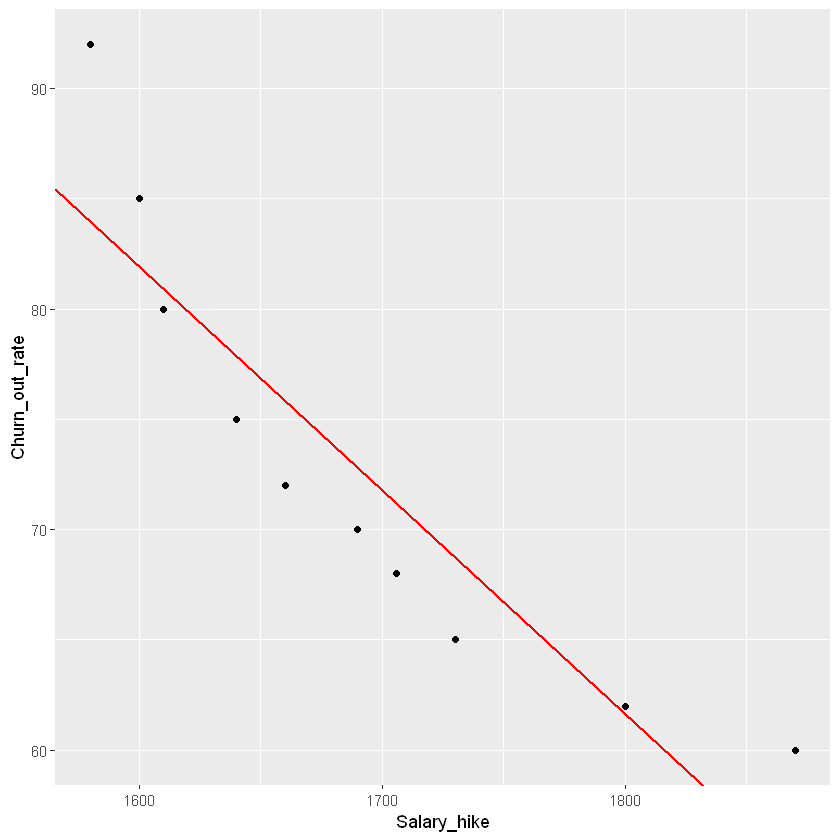

In [26]:
# adding regression line with ggplot2 A scattar plot 
ggplot(del,aes(x=Salary_hike,y=Churn_out_rate)) +geom_point()+geom_abline(intercept = 244.36491  ,slope =  -0.10154 ,color ='red',size =.65 )# visualizsing geoom point 

summary(lm)

In [11]:
Y = 244.36491 + 0.10154*1000
Y

[1] 345.9049

In [27]:
# Data normality check
shapiro.test(Salary_hike) # Data is normal 
shapiro.test(Churn_out_rate) #  Data is normal


	Shapiro-Wilk normality test

data:  Salary_hike
W = 0.93528, p-value = 0.5018



	Shapiro-Wilk normality test

data:  Churn_out_rate
W = 0.95555, p-value = 0.7342


[1] -0.9117216


Call:
lm(formula = Churn_out_rate ~ Salary_hike, data = emp)

Residuals:
   Min     1Q Median     3Q    Max 
-3.804 -3.059 -1.819  2.430  8.072 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 244.36491   27.35194   8.934 1.96e-05 ***
Salary_hike  -0.10154    0.01618  -6.277 0.000239 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.469 on 8 degrees of freedom
Multiple R-squared:  0.8312,	Adjusted R-squared:  0.8101 
F-statistic:  39.4 on 1 and 8 DF,  p-value: 0.0002386


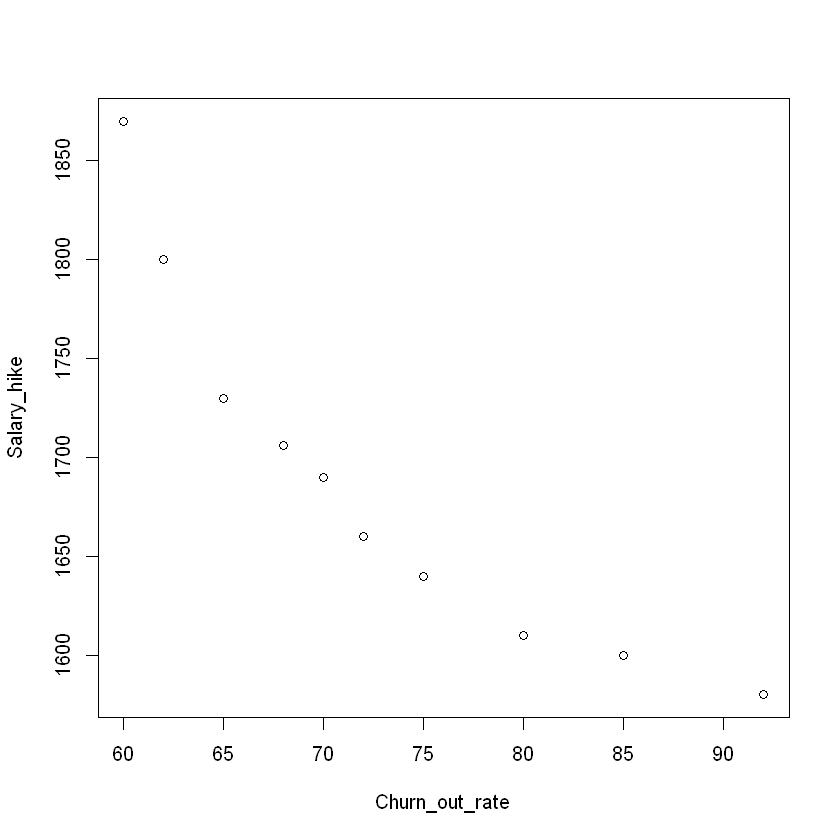

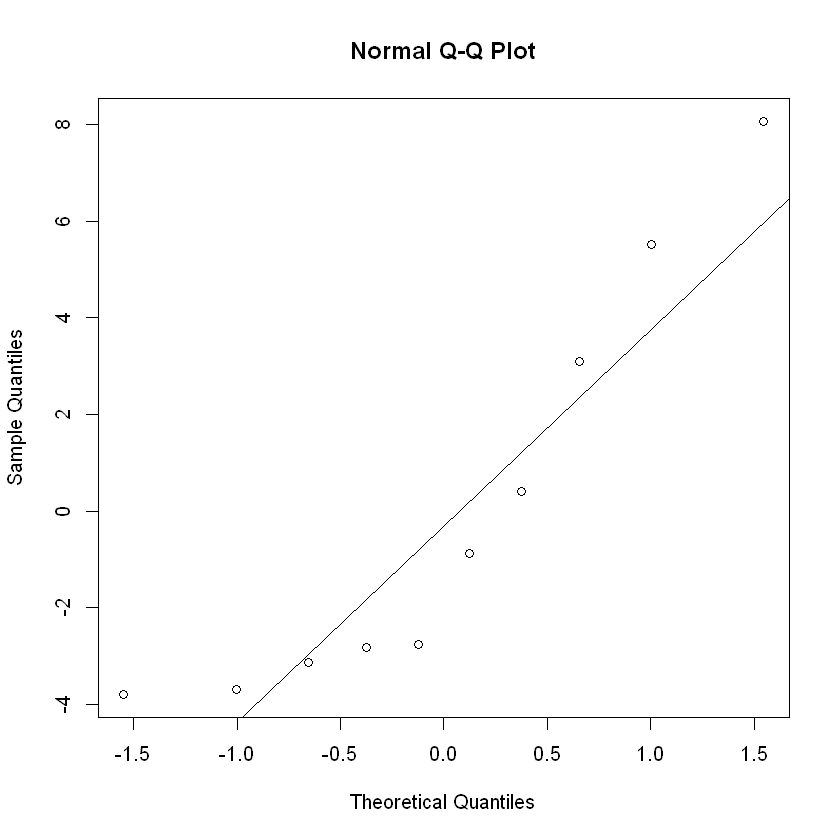

[1] 3.997528

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.998   3.998   3.998   3.998   3.998   3.998 

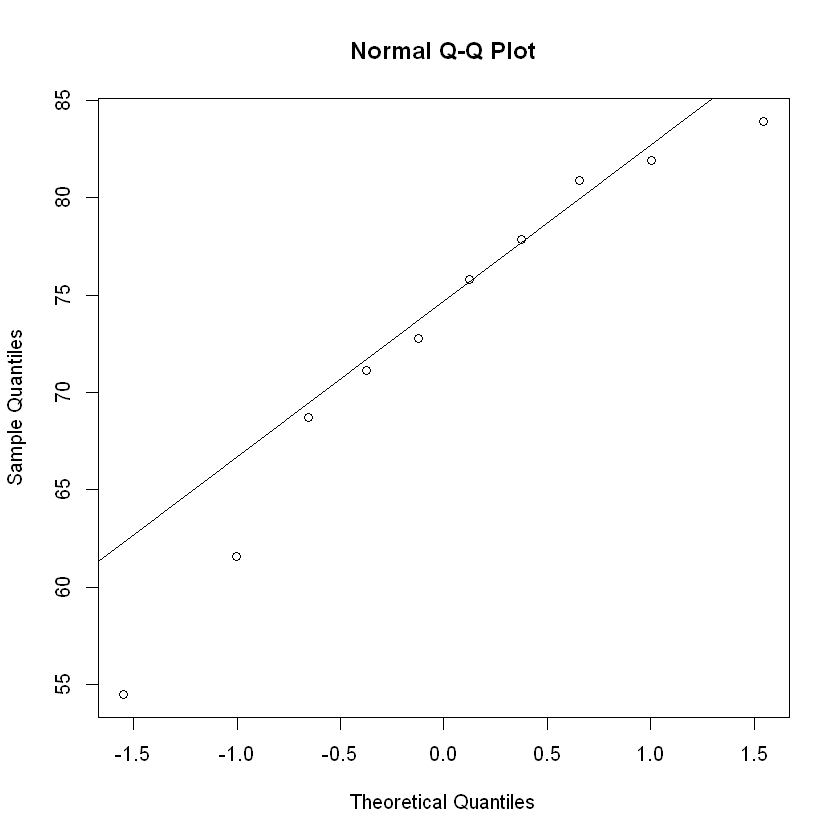

In [36]:
# Log model-1 # exponentioal model
plot( Churn_out_rate,Salary_hike) 
cor(Churn_out_rate,Salary_hike)# cor relation little bit improved 
lm_Salary_hike  <- lm(Churn_out_rate~Salary_hike,data = emp)
summary(lm_Salary_hike) # after transformatin r square improved but not significant

qqnorm(resid(lm_Salary_hike)) # checking residual value its not a linear
qqline(resid(lm_Salary_hike)) # checking residual value its not a linear
qqnorm(fitted.values(lm_Salary_hike)) # still it is not fitted values
qqline(fitted.values(lm_Salary_hike)) # still it is not fitted values

rmse_Salary_hike <- sqrt(mean(lm_Salary_hike$residuals^2))
rmse_Salary_hike # rmse not imporved , residual errors is large
summary(rmse_Salary_hike) # rmse need to imporved 

In [1]:
# log transformation  Exponential model 2 
# Log model-2 
plot(log(Churn_out_rate), Salary_hike) 
cor(log(Churn_out_rate), Salary_hike)
lm_Log_Churn_out_rate <-lm(log(Churn_out_rate) ~ Salary_hike,data =emp) # log transformation

summary(lm_Log_Churn_out_rate) # after transformatin r square little bit improved but not find model

qqnorm(resid(lm_Log_Churn_out_rate)) # checking residual value its not a linear
qqline(resid(lm_Log_Churn_out_rate)) # checking residual value its not a linear
qqnorm(fitted.values(lm_Log_Churn_out_rate)) # still it is not fitted values
qqline(fitted.values(lm_Log_Churn_out_rate)) # still it is not fitted values

rmse_Delivery_time <- sqrt(mean(lm_Churn_out_rate$residuals^2))
rmse_Delivery_time # rmse  imporved 
summary(rmse_Churn_out_rate)

ERROR: Error in plot(log(Churn_out_rate), Salary_hike): object 'Churn_out_rate' not found
